In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp

import time

In [2]:

class function_A():
    def f(self, x):
        return (x[0])**4 + 1*(x[1]-0)**2
    # def dfdx(self, x):
    #     return 4*(x[0])**3
    # def dfdy(self, x):
    #     return (x[1]-0)
    def dfdx_aprox(self, xy, h=0.0000001):
        fminus = self.f([xy[0]-h,xy[1]]) 
        fplus = self.f([xy[0]+h,xy[1]])
        dfdx = (fplus-fminus)/(2*h)
        return dfdx
    def dfdy_aprox(self, xy, h=0.0000001):
        fminus = self.f([xy[0],xy[1]-h]) 
        fplus = self.f([xy[0],xy[1]+h])
        dfdy = (fplus-fminus)/(2*h)
        return dfdy

In [3]:
#function: Max(x-8,0)+3*|y-0|
class function_B():
    def f(self, x):
        return np.maximum(x[0] - 8, 0) + 4 * np.absolute(x[1] - 0)# function value f(x)
    def dfdx_aprox(self, xy, h=0.0000001):
        fminus = self.f([xy[0]-h,xy[1]]) 
        fplus = self.f([xy[0]+h,xy[1]])
        dfdx = (fplus-fminus)/(2*h)
        return dfdx
    def dfdy_aprox(self, xy, h=0.0000001):
        fminus = self.f([xy[0],xy[1]-h]) 
        fplus = self.f([xy[0],xy[1]+h])
        dfdy = (fplus-fminus)/(2*h)
        return dfdy
    
  

In [4]:
def gradDescent_2d(fn,start,alpha,num_iters):
    
    x0 = start
    X=np.array([x0[0]]); 
    Y=np.array([x0[1]]);
    F_xy=np.array([fn.f(x0)]);

    for k in range(num_iters):
        x0 = x0 - alpha*np.array([fn.dfdx_aprox(x0), fn.dfdy_aprox(x0)])
        X=np.append(X,x0[0]); 
        Y=np.append(Y,x0[1]);
        F_xy=np.append(F_xy,fn.f(x0));
    return (X,Y, F_xy)


In [5]:

def global_random_search_V1(n, l, u, N, fn):
    """
    n: number of parameters
    l: list of minimum values for each parameter
    u: list of maximum values for each parameter
    N: number of samples to take
    cost_function: function to minimize
    """
    best_cost = np.inf #initialise best cost to infinity
    best_params = None #initialise best parameters to None

    X = np.array([]) #initialise X to empty array
    Y = np.array([]) # initialise Y to empty array
    F= np.array([]) # initialise cost to empty array


    for i in range(N):

        params = np.random.uniform(l, u, n)#x,y
        cost = fn.f((params[0], params[1]))
        if cost < best_cost:
            best_cost = cost
            best_params = params
 
           
        X=np.append(X,best_params[0]);
        Y=np.append(Y,best_params[1]);
        F=np.append(F,best_cost);
      

        
    return X, Y, F



In [6]:

def global_random_search_V2(n, l, u, N, fn):
    """
    n: number of parameters
    l: list of minimum values for each parameter
    u: list of maximum values for each parameter
    N: number of samples to take
    cost_function: function to minimize
    """
    best_cost = np.inf
    best_params = None

    X = np.array([])
    Y = np.array([])
    F= np.array([])

    



    for i in range(N):


        params = np.random.uniform(l, u, n)#x,y
        cost = fn.f((params[0], params[1]))
        if cost < best_cost:
            best_cost = cost
            best_params = params
           
        X=np.append(X,params[0]);
        Y=np.append(Y,params[1]);
        F=np.append(F,cost);

        

    return X, Y, F, best_params, best_cost


In [19]:
def polulation_random_search(l,u,M, N, fn, repeat):
    """
    l: list of minimum values for each parameter
    u: list of maximum values for each parameter
    M: number of samples to take
    N: number of samples to take
    cost_function: function to minimize
    """


    X = np.array([]) #x
    Y = np.array([]) #y
    F = np.array([]) #f(x,y)
    n = 2
  
    for i in range(repeat):
        
        
        X1, Y1, F1, best_params, best_cost= global_random_search_V2(n, l, u, N, fn)
        #sort best cost as lowest to highest
        p = np.argsort(F1)[:M]
       
        x = X1[p] # index of x with lowest cost
        y = Y1[p]   # index of y with lowest cost
        f = F1[p] # index of f(x,y) with lowest cost 

        mu_x = np.mean(x)
        std_x = np.std(x)
        mu_y = np.mean(y)
        std_y = np.std(y)
    
        u = [mu_x-std_x, mu_y-std_y]
        l = [mu_x+std_x, mu_y+std_y]


        X = np.append(X, [x])
        Y = np.append(Y, [y])
        F = np.append(F, [f])
    

    return X, Y, F
     

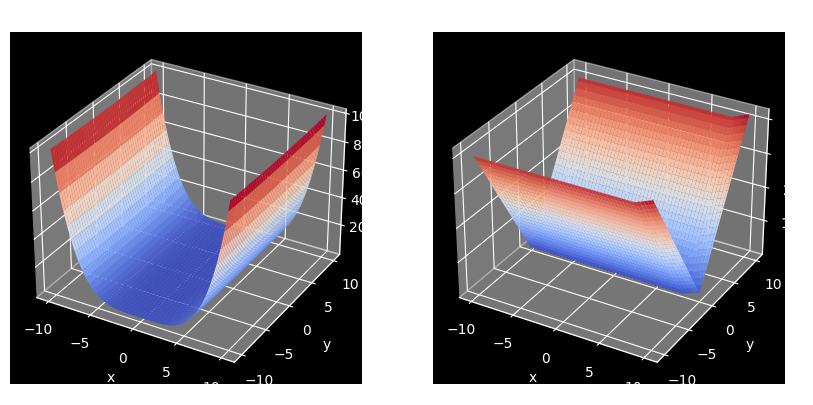

In [8]:

x_range = np.linspace(-10, 10, 100)
y_range = np.linspace(-10, 10, 100)

X, Y = np.meshgrid(x_range, y_range)

fn_A = function_A()
fn_B = function_B()


Z = fn_A.f((X ,Y))

# plot the function as a surface
fig = plt.figure(figsize=(10, 10))
plt.style.use('dark_background')

# add the first subplot
ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.plot_surface(X, Y, Z, cmap='coolwarm')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title('Function A : f(x,y) = (x-0)^4 + (y-0)^2')

# add the second subplot
ax = fig.add_subplot(1, 2, 2, projection='3d')
ax.plot_surface(X, Y, fn_B.f((X, Y)), cmap='coolwarm')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title('Function B: f(x,y) = Max(x-8,0)+3*|y-0|')
plt.show()


In [9]:
fn = function_B()
start = np.array([10,10])
alpha = 0.5
num_iters = 20

time_GD = []
time_RC = []
list_OC = []


for i in range(100):
    tic = time.time()
    X, Y, F = gradDescent_2d(fn,start,alpha,num_iters)
    toc = time.time()
    time_GD.append(toc-tic)

    tic = time.time()
    X1, Y1, F1 = global_random_search_V1(2, [-10,-10], [10,10], num_iters, fn)
    toc = time.time()
    time_RC.append(toc-tic)
    list_OC.append(F1)


avg_OC = np.mean(list_OC, axis=0)
avg_time_GD = np.mean(time_GD)
avg_time_RC = np.mean(time_RC)


# #plot the results
# fig = plt.figure(figsize=(10, 5))
# plt.style.use('dark_background')

# plt.title('Gradient Descent vs Random Search : function B')
# plt.xlabel('Iterations')
# plt.ylabel('Cost')
# plt.plot(avg_OC, marker = 'o', label='Random Search, time = ' + str(round(avg_time_RC, 6)))
# plt.plot(F, marker = 'o',label='Gradient Descent, alpha = ' + str(alpha) + ', time = ' + str(round(avg_time_GD, 6)))
# plt.legend()
# plt.show()



   


    


Average time for Gradient Descent:  0.001565396785736084
Average time for Random Search:  0.0022710442543029787
Average time for Population Random Search:  0.008317148685455323


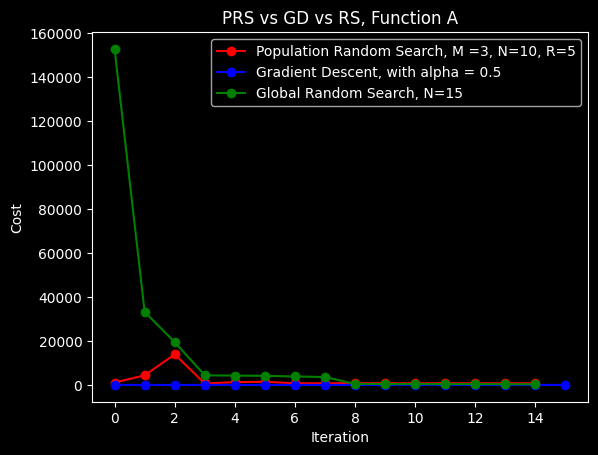

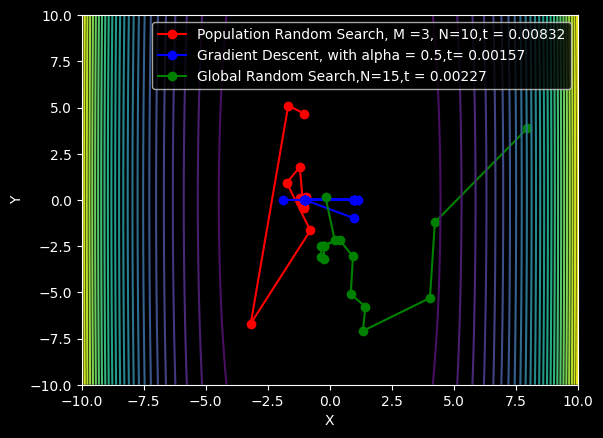

In [39]:
import time 
#question b

n = 2
l = [-30, -30]
u = [30 , 30]
N = 10
M = 3
fn = function_A()
best_cost_global = []
repeat = 5

#grandient descent
start = [1,-1]
alpha = 0.5
num_iters = 15

list_X = []; list_Y =[]; list_F = []
list_X1 = []; list_Y1 = []; list_F1 = []
list_X2 = []; list_Y2 = []; list_F2 = []

time_GD = []
time_RC = []
time_PRS = []

for i in range(20):

    tic = time.time()
    X, Y, F= polulation_random_search(l,u,M, N, fn, repeat)
    toc = time.time()
    #time is current + previous
    t = toc-tic
    time_PRS.append(t)


    tic = time.time()
    X1, Y1, F1 = gradDescent_2d(fn,start,alpha,num_iters)
    toc = time.time()
    time_GD.append(toc-tic)


    tic = time.time()
    X2, Y2, F2 = global_random_search_V1(2, l, u, num_iters, fn)
    toc = time.time()
    time_RC.append(toc-tic)


    list_X.append(X)
    list_Y.append(Y)
    list_F.append(F)
    list_X1.append(X1)
    list_Y1.append(Y1)
    list_F1.append(F1)
    list_X2.append(X2)
    list_Y2.append(Y2)
    list_F2.append(F2)

X = np.mean(list_X, axis=0)
Y = np.mean(list_Y, axis=0)
F = np.mean(list_F, axis=0)
X1 = np.mean(list_X1, axis=0)
Y1 = np.mean(list_Y1, axis=0)
F1 = np.mean(list_F1, axis=0)
X2 = np.mean(list_X2, axis=0)
Y2 = np.mean(list_Y2, axis=0)
F2 = np.mean(list_F2, axis=0)


avg_time_GD = np.mean(time_GD)
avg_time_RC = np.mean(time_RC)
avg_time_PRS = np.mean(time_PRS)

print ('Average time for Gradient Descent: ', avg_time_GD)
print ('Average time for Random Search: ', avg_time_RC)
print ('Average time for Population Random Search: ', avg_time_PRS)

#plot best cost_list

plt.title('PRS vs GD vs RS, Function A')
plt.plot(F, marker='o', color='red', label = 'Population Random Search, M =' + str(M) + ', N=' + str(N) + ', R=' + str(repeat))
plt.plot(F1, marker='o', color='blue', label = 'Gradient Descent, with alpha = 0.5')
plt.plot(F2, marker='o', color='green', label = 'Global Random Search, N=' + str(num_iters))
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.legend()
plt.show()


plt.plot(X, Y, marker='o', color='red', label = 'Population Random Search, M =' + str(M) + ', N=' + str(N) +',t = ' + str(round(avg_time_PRS, 5)))
plt.plot(X1, Y1, marker='o', color='blue', label = 'Gradient Descent, with alpha = 0.5'+     ',t= ' + str(round(avg_time_GD, 5)))
plt.plot(X2, Y2, marker='o', color='green', label = 'Global Random Search,N=' + str(num_iters)+ ',t = ' + str(round(avg_time_RC, 5)))


#contour plot
x = np.linspace(-10, 10, 100)
y = np.linspace(-10, 10, 100)
X, Y = np.meshgrid(x, y)
Z = fn.f((X, Y))
plt.contour(X, Y, Z, 25)

plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()


In [17]:
fn = function_B()

x = 5
y = 0
z = fn.f((x,y))
print ('The minimum value of function B is: ', z)


The minimum value of function B is:  0


In [11]:
#plot time
np.shape(F)


(15,)

In [12]:
print(np.shape(X2))
print(np.shape(Y2))
print(np.shape(F2))

(15,)
(15,)
(15,)


In [13]:
P_best_params, P_best_score, = global_random_search_V2(10, 10, fn_B, [l, u], num_neighbors)
print(P_best_score)    
print(P_best_params)



NameError: name 'num_neighbors' is not defined